# 线性回归

## 使用Numpy完成线性回归
> https://github.com/fengdu78/WZU-machine-learning-course/tree/main/code/lesson2-code

### 单变量线性回归


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [17]:
# 准备数据
SIZE = 100
# x_train = np.random.random((SIZE,1))
# y_train = x_train * 3 + (np.random.random((SIZE,1)) -0.5) * 0.001
data = pd.DataFrame(np.random.random((SIZE, 2)), columns=['X',"Y"])
data['Y'] =  data['X'] * 3 + (np.random.random() -0.5) * 0.1

In [ ]:
# 读取数据
path = 'data/regress_data1.csv'
data = pd.read_csv(path)
data.head()

In [13]:
data.describe()

,X,Y
count,50.000000,50.000000
mean,0.502827,1.513401
std,0.311373,0.934118
min,0.001129,0.008305
25%,0.237821,0.718381
50%,0.504825,1.519394
75%,0.801462,2.409304
max,0.986504,2.964431


使用matplotlib 看下数据长什么样子

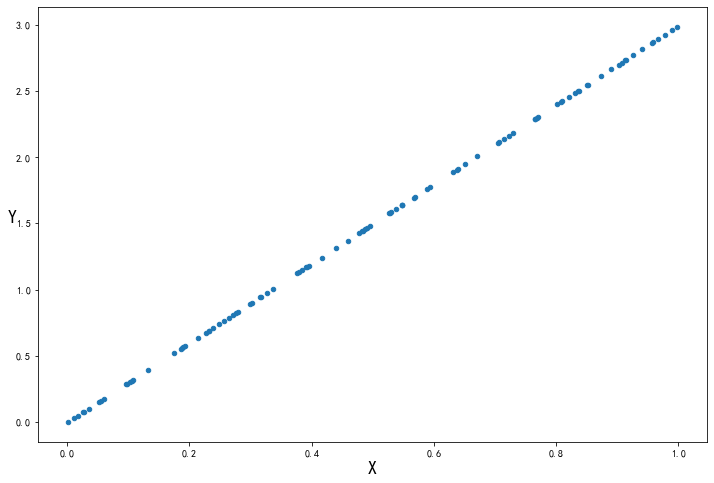

In [18]:
data.plot(kind='scatter', x='X', y='Y', figsize=(12,8))
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', rotation=0, fontsize=18)
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化代价函数。

首先，我们将创建一个以参数$w$为特征函数的代价函数

$$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

其中：\\[{{h}}\left( x \right)={{w}^{T}}X={{w }_{0}}{{x}_{0}}+{{w }_{1}}{{x}_{1}}+{{w }_{2}}{{x}_{2}}+...+{{w }_{n}}{{x}_{n}}\\]

In [25]:
def compute_cost(X, y, w):
    inner = np.power(((X * w.T) - y), 2)# (m,n) @ (n, 1) -> (n, 1)
#     return np.sum(inner) / (2 * len(X))
    return np.sum(inner) / (2 * X.shape[0])

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [20]:
data.insert(0, 'Ones', 1)
print(data.head())

   Ones         X         Y
0     1  0.809773  2.422526
1     1  0.913342  2.733234
2     1  0.192700  0.571307
3     1  0.836752  2.503464
4     1  0.890153  2.663667


现在我们来做一些变量初始化。

In [27]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:]#X是所有行，最后一列

In [28]:
X.head()

,Ones,X
0,1,0.809773
1,1,0.913342
2,1,0.192700
3,1,0.836752
4,1,0.890153


In [29]:
y.head()

,Y
0,2.422526
1,2.733234
2,0.571307
3,2.503464
4,2.663667


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化w。

In [30]:
X = np.matrix(X.values)
y = np.matrix(y.values)
w = np.matrix(np.array([0,0]))
print(w) # w 是一个(1,2)矩阵

[[0 0]]


In [31]:
print(X.shape, w.shape, y.shape)

(100, 2) (1, 2) (100, 1)


计算代价函数 (theta初始值为0).

In [32]:
cost = compute_cost(X, y, w)
print('初始参数下的代价值', cost)

初始参数下的代价值 1.4880983086305348


# Batch Gradient Decent（批量梯度下降）

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right)$$

In [36]:
def batch_gradient_descent(X, y, w, alpha, iters):
    temp = np.matrix(np.zeros(w.shape))
    parameters = int(w.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * w.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = w[0, j] - ((alpha / len(X)) * np.sum(term))

        w = temp
        cost[i] = compute_cost(X, y, w)

    return w, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [35]:
alpha = 0.01
iters = 1000

In [37]:
# 运行梯度下降算法来将我们的参数θ适合于训练集。
g, cost = batch_gradient_descent(X, y, w, alpha, iters)
# print(g, cost)
print('训练后参数：', g)

[[0.61853096 1.82565681]] [1.45646782 1.42562398 1.39554702 1.36621771 1.33761726 1.30972739
 1.28253025 1.25600845 1.23014503 1.20492348 1.18032767 1.1563419
 1.13295085 1.1101396  1.08789359 1.06619863 1.0450409  1.0244069
 1.00428349 0.98465786 0.96551751 0.94685026 0.92864424 0.91088787
 0.89356987 0.87667924 0.86020524 0.84413744 0.82846563 0.81317987
 0.79827048 0.78372802 0.76954327 0.75570727 0.74221126 0.72904671
 0.7162053  0.70367894 0.69145971 0.67953991 0.66791203 0.65656875
 0.64550292 0.63470759 0.62417598 0.61390146 0.6038776  0.5940981
 0.58455683 0.57524783 0.56616527 0.55730346 0.54865688 0.54022013
 0.53198795 0.5239552  0.5161169  0.50846815 0.50100422 0.49372048
 0.48661239 0.47967557 0.47290572 0.46629865 0.45985029 0.45355665
 0.44741387 0.44141817 0.43556585 0.42985332 0.4242771  0.41883375
 0.41351996 0.40833247 0.40326813 0.39832385 0.39349663 0.38878353
 0.3841817  0.37968835 0.37530077 0.37101631 0.36683239 0.36274649
 0.35875616 0.35485901 0.35105272 0.347

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [38]:
const = compute_cost(X, y, g)
print('训练后的代价值:', const)

训练后的代价值: 0.06100197196403416


现在我们来绘制线性模型以及数据，直观地看出它的拟合。

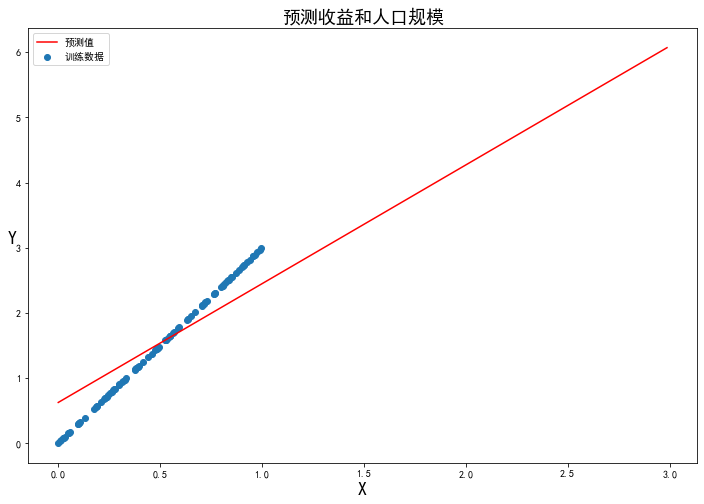

In [39]:
x = np.linspace(data['X'].min(), data['Y'].max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['X'], data['Y'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', rotation=0, fontsize=18)
ax.set_title('预测收益和人口规模', fontsize=18)
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

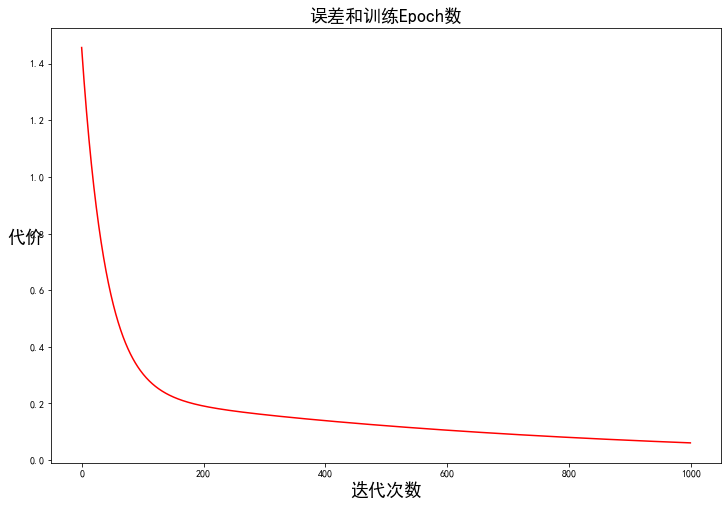

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
ax.set_title('误差和训练Epoch数', fontsize=18)
plt.show()


## 使用scikit-learn的线性回归函数

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(model.coef_)

[[0. 3.]]


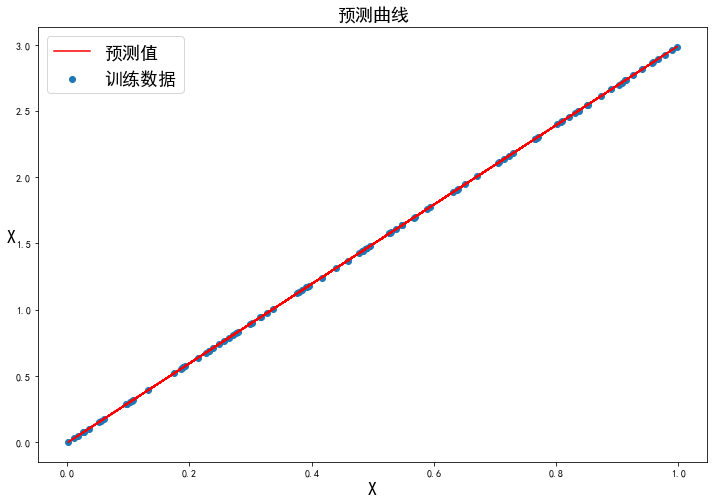

In [43]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(data['X'], data['Y'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('X', rotation=0, fontsize=18)
ax.set_title('预测曲线', fontsize=18)
plt.show()

## $L_2$正则化
$J (  { w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } w_ { j } ^ { 2 }$，此时称作`Ridge Regression`：

In [46]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X, y)
print('模型参数', model.coef_)

[[0.         2.69110631]]


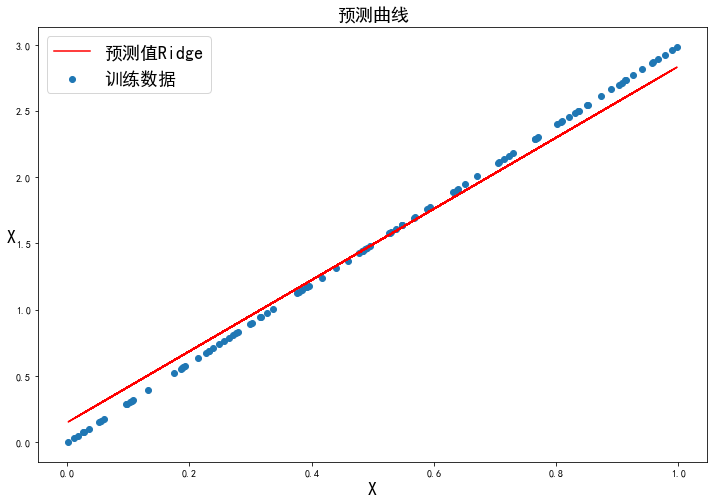

In [47]:
x2 = np.array(X[:, 1].A1)
f2 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x2, f2, 'r', label='预测值Ridge')
ax.scatter(data['X'], data['Y'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('X', rotation=0, fontsize=18)
plt.show()

## $L_1$正则化：
$J (  {w } ) = \frac { 1 } { 2 } \sum _ { i = 1 } ^ { m } ( h _ { w} ( x ^ { ( i ) } ) - y ^ { ( i ) } ) ^ { 2 } + \lambda \sum _ { j = 1 } ^ { n } | w _ { j } |$，此时称作`Lasso Regression`

In [50]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X, y)
print('模型参数', model.coef_)

模型参数 [0. 0.]


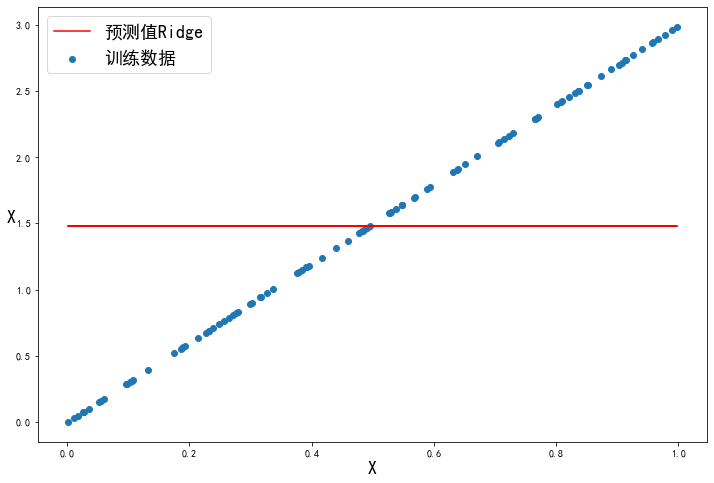

In [51]:
x3 = np.array(X[:, 1].A1)
f3 = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x3, f3, 'r', label='预测值Ridge')
ax.scatter(data['X'], data['Y'], label='训练数据')
ax.legend(loc=2, fontsize=18)
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('X', rotation=0, fontsize=18)
plt.show()


## 最小二乘法(LSM)：

最小二乘法的需要求解最优参数$w^{*}$：

已知：目标函数

$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {h}\left( {x^{(i)}} \right)-{y^{(i)}} \right)}^{2}}}$

其中：${h}\left( x \right)={w^{T}}X={w_{0}}{x_{0}}+{w_{1}}{x_{1}}+{w_{2}}{x_{2}}+...+{w_{n}}{x_{n}}$

将向量表达形式转为矩阵表达形式，则有$J(w )=\frac{1}{2}{{\left( Xw -y\right)}^{2}}$ ，其中$X$为$m$行$n+1$列的矩阵（$m$为样本个数，$n$为特征个数），$w$为$n+1$行1列的矩阵(包含了$w_0$)，$y$为$m$行1列的矩阵，则可以求得最优参数$w^{*} ={{\left( {X^{T}}X \right)}^{-1}}{X^{T}}y$

梯度下降与最小二乘法的比较：

梯度下降：需要选择学习率$\alpha$，需要多次迭代，当特征数量$n$大时也能较好适用，适用于各种类型的模型

最小二乘法：不需要选择学习率$\alpha$，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量$n$较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n^3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [52]:
def LSM(X, y):
    w = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return w

In [53]:
final_w2=LSM(X, y)
#感觉和批量梯度下降的theta的值有点差距
final_w2

matrix([[-0.00679208],
        [ 3.        ]])

In [ ]:
#梯度下降得到的结果是 matrix([[-3.24140214,  1.1272942 ]])

## 使用Pytorch 完成线性回归
> 线性回归就是一个不加激活函数的全连接层

In [ ]:
# 准备数据
import numpy as np
x_train = np.random.random((11,1))
y_train = x_train * 3 + (np.random.random((11,1)) -0.5) * 0.001
x_train = np.array(x_train,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)
# x_train.dtype = np.float32

print(x_train.dtype, x_train)
print(y_train.dtype, y_train)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class LinearRegressionNet(nn.Module):
    def __init__(self,input_dim, output_dim):
        super(LinearRegressionNet, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self,x):
        x = self.linear(x)
        return x


In [ ]:
net = LinearRegressionNet(1, 1)
print(net)


In [ ]:
epochs = 1000
lr = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=lr)
criterion = nn.MSELoss() # 使用MSE损失函数

for epoch in range(epochs):
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    optimizer.zero_grad() # 梯度清0
    output = net(inputs)
    loss = criterion(output,labels)
    loss.backward() # 反向传播
    optimizer.step() # 更新权重 (基于学习率和梯度)
    if epoch % 50 == 0:
        print(f'epoch:{epoch}, loss:{loss.item()}')


In [ ]:
# 预测
test_data = torch.from_numpy(x_train).requires_grad_()
print(test_data)
pred = net(test_data).data.numpy()
print(pred)


In [ ]:
# 使用GPU训练
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device) # 模型传入gpu
# 数据传入
inputs = torch.from_numpy(x_train).to(device)
labels = torch.from_numpy(y_train).to(device)